<a href="https://colab.research.google.com/github/SridharGuggilla/IPL_Data_Analysis-with-plotly.graph_objects-/blob/main/IPL_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
manasgarg_ipl_path = kagglehub.dataset_download('manasgarg/ipl')

print('Data source import complete.')


100%|██████████| 1.01M/1.01M [00:00<00:00, 89.2MB/s]

Extracting files...
Data source import complete.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [6]:
# Load the data (adjust paths as needed)
deliveries_df = pd.read_csv('/content/deliveries.csv')
matches_df = pd.read_csv('/content/matches.csv')

In [ ]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [ ]:
deliveries_df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [ ]:
deliveries_df.shape

(150460, 21)

In [9]:
# Drop rows with missing 'winner' and 'city' in the matches dataset (important for match outcomes)
matches_df_clean = matches_df.dropna(subset=['winner', 'city'])

In [8]:
# For the deliveries dataset, drop rows where dismissal info is missing (optional)
deliveries_df_clean = deliveries_df.dropna(subset=['player_dismissed'])

In [10]:
# Total Matches Won by Each Team
team_wins = matches_df_clean['winner'].value_counts()

# Create a color palette for the pie chart
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
          '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
          '#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD']

# Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=team_wins.index,
    values=team_wins.values,
    pull=[0.1] + [0] * (len(team_wins) - 1),  # Pull the largest slice
    marker=dict(colors=colors),  # Set custom colors
    hoverinfo='label+percent+value',  # Show label, percent, and value on hover
    textinfo='label+percent',  # Show label and percent inside the pie
    textfont=dict(size=14)  # Adjust font size for better visibility
)])

# Customize the layout for the pie chart
fig.update_layout(
    title_text="Total Matches Won by Each Team",  # Title
    title_x=0.5,  # Center title
    title_font=dict(size=24, color='black', family='Arial'),  # Increased title font size
    showlegend=True,  # Show the legend
    legend=dict(
        orientation="v",  # Vertical orientation
        yanchor="top",
        y=0.5,  # Center the legend vertically
        xanchor="left",
        x=1.1,  # Position the legend to the right of the chart
        font=dict(size=12)
    ),
    margin=dict(t=100, b=120, l=40, r=40),  # Adjust margins for better spacing
    height=800,  # Increased height of the figure
    width=1000  # Increased width to accommodate both elements
)

# Show the plot
fig.show()


In [11]:
# Group the data by city to count the number of matches played in each city
matches_count_by_city = matches_df_clean['city'].value_counts().reset_index()
matches_count_by_city.columns = ['city', 'match_count']

# Create a horizontal bar chart
fig = go.Figure()

# Add bar trace for match count
fig.add_trace(go.Bar(
    y=matches_count_by_city['city'],  # Cities on the y-axis for horizontal bars
    x=matches_count_by_city['match_count'],  # Number of matches on the x-axis
    orientation='h',  # Horizontal bars
    marker=dict(color='teal'),  # Color of the bars
    name='Match Count'
))

# Update the layout for a large figure size and clear city names
fig.update_layout(
    title_text='Count of Matches Played in Different Cities',
    title_x=0.5,
    title_font=dict(size=24, color='navy'),
    xaxis_title='Number of Matches',
    yaxis_title='City',
    yaxis=dict(tickfont=dict(size=14)),  # Increase font size for y-axis labels (city names)
    xaxis=dict(tickangle=0),  # Keep tick angle default for x-axis
    margin=dict(t=100, b=100, l=200, r=40),  # Extra margin for city names
    height=800,  # Larger height for better visibility
    width=1200,  # Wider plot for more space
    showlegend=False
)

# Customize the grid lines for the x-axis
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Show the plot
fig.show()


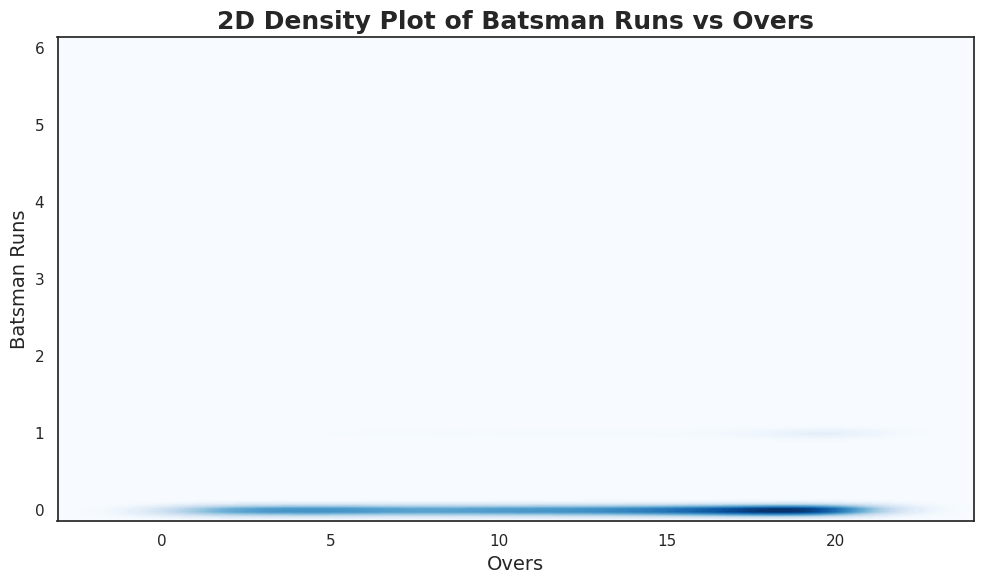

In [12]:
# Bivariate KDE Plot for Relationship Between Batsman Runs and Overs
sns.set_theme(style="white")

plt.figure(figsize=(10, 6))
sns.kdeplot(
    x='over',
    y='batsman_runs',
    data=deliveries_df_clean,
    cmap="Blues",  # Professional blue gradient
    fill=True,  # Fill the density areas
    thresh=0,  # Show even the smallest density levels
    levels=100  # Number of contour levels to show more detail
)

# Add titles and labels
plt.title('2D Density Plot of Batsman Runs vs Overs', fontsize=18, fontweight='bold')
plt.xlabel('Overs', fontsize=14)
plt.ylabel('Batsman Runs', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
# Prepare the data for the bar chart
average_runs_per_over = deliveries_df_clean.groupby('over')['batsman_runs'].mean().reset_index()

# Scale the average runs (e.g., multiply by 100)
scale_ratio = 100  # Define the scale ratio
average_runs_per_over['batsman_runs'] = (average_runs_per_over['batsman_runs'] * scale_ratio).astype(int)

# Create the bar chart
fig = go.Figure()

# Add a bar trace to the figure
fig.add_trace(go.Bar(
    x=average_runs_per_over['over'],
    y=average_runs_per_over['batsman_runs'],
    name='Average Batsman Runs',  # Legend name
    marker_color='royalblue'  # Bar color
))

# Customize the layout for the bar chart
fig.update_layout(
    title_text='Average Batsman Runs by Over (Scaled)',  # Title
    title_x=0.5,  # Center title
    title_font=dict(size=24, color='black', family='Arial'),  # Title font size
    xaxis_title='Overs',  # X-axis label
    yaxis_title=f'Average Batsman Runs (Scaled by {scale_ratio})',  # Y-axis label
    xaxis=dict(tickangle=45),  # Rotate x-ticks for better readability
    margin=dict(t=100, b=100, l=40, r=40),  # Adjust margins for better spacing
    height=600,  # Height of the figure
    width=800  # Width of the figure
)

# Add data labels on top of each bar
for i, row in average_runs_per_over.iterrows():
    fig.add_annotation(
        x=row['over'],
        y=row['batsman_runs'],
        text=str(row['batsman_runs']),
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40,
        font=dict(size=12, color='black')
    )

# Annotate the scale ratio at the top left corner
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.02, y=0.95,
    text=f'Scale Ratio: {scale_ratio}',
    showarrow=False,
    font=dict(size=14, color='black', weight='bold')  # Keep the 'weight' for bold font
)

# Show the plot
fig.show()


In [14]:
# Prepare the data for the line chart
season_match_count = matches_df_clean.groupby('season').size()

# Create the line chart
fig = go.Figure()

# Add a line to the figure
fig.add_trace(go.Scatter(
    x=season_match_count.index,
    y=season_match_count.values,
    mode='lines+markers',  # Show both lines and markers
    name='Matches Played',  # Legend name
    line=dict(color='royalblue', width=2),  # Line color and width
    marker=dict(size=8)  # Marker size
))

# Customize the layout for the line chart
fig.update_layout(
    title_text='Number of Matches Played Each Season',  # Title
    title_x=0.5,  # Center title
    title_font=dict(size=24, color='black', family='Arial'),  # Title font size
    xaxis_title='Season',  # X-axis label
    yaxis_title='Number of Matches',  # Y-axis label
    xaxis=dict(tickangle=45),  # Rotate x-ticks for better readability
    margin=dict(t=100, b=100, l=40, r=40),  # Adjust margins for better spacing
    height=600,  # Height of the figure
    width=800  # Width of the figure
)

# Show the plot
fig.show()


In [15]:
# Group the data by bowling team and dismissal kind, and unstack to create a DataFrame for the stacked bar chart
dismissal_by_team = deliveries_df_clean.groupby(['bowling_team', 'dismissal_kind']).size().unstack().fillna(0)

# Create a list of traces, one for each dismissal type
traces = []
for dismissal_type in dismissal_by_team.columns:
    traces.append(go.Bar(
        y=dismissal_by_team.index,  # Set y to teams for horizontal bars
        x=dismissal_by_team[dismissal_type],
        name=dismissal_type,
        orientation='h'  # Set orientation to 'h' for horizontal bars
    ))

# Create the figure
fig = go.Figure(data=traces)

# Update the layout to style the chart
fig.update_layout(
    title_text='Dismissal Types by Team',
    title_x=0.5,
    title_font=dict(size=24, color='darkblue'),
    yaxis_title='Team',
    xaxis_title='Number of Dismissals',
    barmode='stack',  # Stack the bars
    legend_title_text='Dismissal Types',
    legend=dict(
        x=1.05, y=1,
        font=dict(size=12),
        title_font=dict(size=13),
        orientation="v"
    ),
    margin=dict(t=100, b=100, l=140, r=40),  # Adjust margins to fit the legend
    height=600,
    width=900
)

# Show the plot
fig.show()


In [16]:
# Calculate the cumulative runs scored by each batsman across all seasons
cumulative_runs_by_batsman = deliveries_df_clean.groupby('batsman')['batsman_runs'].sum().reset_index()

# Filter out batsmen who scored zero runs
cumulative_runs_by_batsman = cumulative_runs_by_batsman[cumulative_runs_by_batsman['batsman_runs'] > 0]

# Sort the data in descending order to show top run-scorers first
cumulative_runs_by_batsman = cumulative_runs_by_batsman.sort_values(by='batsman_runs', ascending=False)

# Create a new figure for the cumulative runs bar chart
fig2 = go.Figure()

# Add the bar plot for cumulative runs by each batsman
fig2.add_trace(go.Bar(
    x=cumulative_runs_by_batsman['batsman'],  # Batsman names on the x-axis
    y=cumulative_runs_by_batsman['batsman_runs'],  # Total runs scored on the y-axis
    name='Cumulative Runs',  # Legend name
    marker=dict(color='skyblue')  # Bar color
))

# Update layout for the bar chart
fig2.update_layout(
    title_text='Cumulative Runs Scored by Batsmen Across All Seasons',
    title_x=0.5,  # Center the title
    title_font=dict(size=24, color='darkblue'),
    xaxis_title='Batsman',
    yaxis_title='Total Runs Scored',
    height=800,  # Larger figure size for better readability
    width=1200,
    xaxis=dict(tickangle=45),  # Rotate x-ticks for better readability
    margin=dict(t=100, b=150, l=100, r=100),  # Adjust margins
    showlegend=False  # Hide legend for a simpler view
)

# Show the plot
fig2.show()


In [17]:
# Calculate the number of matches officiated by each umpire
matches_by_umpire = matches_df_clean['umpire1'].value_counts().reset_index()
matches_by_umpire.columns = ['umpire', 'match_count']

# Create a new figure for the dot plot
fig = go.Figure()

# Add a scatter plot for the number of matches by each umpire
fig.add_trace(go.Scatter(
    x=matches_by_umpire['match_count'],  # Number of matches on the x-axis
    y=matches_by_umpire['umpire'],  # Umpire names on the y-axis
    mode='markers+text',  # Display markers and text
    marker=dict(color='darkorange', size=12),  # Marker color and size
    text=matches_by_umpire['match_count'],  # Display the number of matches
    textposition='middle right',  # Position the text to the right of markers
    name='Matches Officiated'  # Legend name
))

# Update layout for the dot plot
fig.update_layout(
    title_text='Number of Matches Officiated by Each Umpire',
    title_x=0.5,  # Center the title
    title_font=dict(size=24, color='darkorange'),
    xaxis_title='Number of Matches',
    yaxis_title='Umpire',
    height=800,  # Larger figure size for better readability
    width=1000,
    margin=dict(t=100, b=100, l=150, r=50),  # Adjust margins for better spacing
    showlegend=False  # Hide legend for a simpler view
)

# Show the plot
fig.show()


In [18]:
import plotly.graph_objects as go

# Calculate the number of toss wins for each team
toss_wins_by_team = matches_df_clean['toss_winner'].value_counts().reset_index()
toss_wins_by_team.columns = ['team', 'toss_wins']

# Create a Sunburst chart for the toss wins data
fig = go.Figure(go.Sunburst(
    labels=toss_wins_by_team['team'],  # Team names as labels
    parents=[''] * len(toss_wins_by_team),  # Set parents to empty to show only one level
    values=toss_wins_by_team['toss_wins'],  # Number of toss wins as values
    branchvalues="total",  # Use total values for sizing segments
    marker=dict(colors=toss_wins_by_team['toss_wins'], colorscale='Viridis'),  # Color scale for differentiation
    hoverinfo="label+value+percent entry"  # Display detailed information on hover
))

# Update layout for the Sunburst chart
fig.update_layout(
    title_text='Toss Wins by Team (Sunburst Chart)',
    title_x=0.5,  # Center the title
    title_font=dict(size=24, color='darkblue'),
    margin=dict(t=50, b=50, l=50, r=50),  # Adjust margins for better view
    height=700,  # Size for better readability
    width=800
)

# Show the plot
fig.show()
